### 과제 1] 대구지역의 기온 변화 => 25도 이상인 일수(일별로 최고온도가 25도를 넘어가는 일수가 몇일 있는지)
- 데이터: 기상청 사이트

[1] 모듈 로딩 및 데이터 준비 <hr>

In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [257]:
FILE_NAME = '../DATA/대구_온도_75_25.csv'
dataDF = pd.read_csv(FILE_NAME, skiprows=7)
print(dataDF.head())

           날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
0  1975-01-01  143      2.6      1.1      3.8
1  1975-01-02  143      2.2      0.9      4.8
2  1975-01-03  143      1.2     -1.8      5.6
3  1975-01-04  143     -0.3     -2.1      1.9
4  1975-01-05  143      0.5     -4.4      6.1


[2] 데이터 확인 <hr>

In [258]:
# 요약 정보
dataDF.info()

# 날짜 컬럼 앞부분 '\t' 공백 제거
# 지점 컬럼 대구코드값 불필요한 컬럼 제거

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18576 entries, 0 to 18575
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       18576 non-null  object 
 1   지점       18576 non-null  int64  
 2   평균기온(℃)  18575 non-null  float64
 3   최저기온(℃)  18576 non-null  float64
 4   최고기온(℃)  18574 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 725.8+ KB


[3] 기본 전처리 => 불필요한 컬럼, 데이터 삭제 <hr>

In [259]:
# 불필요한 컬럼 제거
dataDF.drop(columns = '지점', inplace = True)
display(dataDF)

# 날짜 컬럼 앞에 붙은 '\t' 제거 -> 날짜 컬럼 타입 object로 str
dataDF['날짜'] = dataDF['날짜'].str.strip()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,1975-01-01,2.6,1.1,3.8
1,1975-01-02,2.2,0.9,4.8
2,1975-01-03,1.2,-1.8,5.6
3,1975-01-04,-0.3,-2.1,1.9
4,1975-01-05,0.5,-4.4,6.1
...,...,...,...,...
18571,2025-11-05,11.8,5.4,20.2
18572,2025-11-06,12.8,6.7,21.2
18573,2025-11-07,13.1,7.7,20.6
18574,2025-11-08,12.9,7.8,18.3


[3] 세부 전처리 <hr> => 결측치/중복값/이상치

In [260]:
# 결측치 확인 및 제거
dataDF.isnull().sum()   # 결측치 확인

# 결측치 존재 행 추출 -> 필터링(만약에 컬럼별로 결측치가 여러개면 OR 연산자로 print)
# 방법 1)
# ex) print(dataDF[dataDF['최고기온(℃)'].isnull() == True] | dataDF[dataDF['평균기온(℃)'].isnull() == True]) 
print(dataDF[dataDF['최고기온(℃)'].isnull() == True])
msDF = dataDF[dataDF['최고기온(℃)'].isnull() == True]

# 방법 2)
# any(): 행/열 방향으로 원소가 1개 이상(1개라도 True면 True)
# all(): 행/열 방향으로 원소가 모두 True면 True
# ★ 주의 ★
# -> 행 단위일 경우 aixs=1: 행을 구성하는 모든 원소 즉, 모든 컬럼값을 확인
# -> 열 단위일 경우 axis=0: 열을 구성하는 모든 원소 즉, 모든 행의 값들 확인
# print(dataDF[dataDF.isnull().any(axis=1)]) 

# print(dataDF.iloc[1238][dataDF.iloc[1238].isnull()].index)

# 데이터의 특성 즉, 기온 무작위성 X => 같은 컬럼의 값들이 서로 연결성
# 삭제하기 말고 채우기 => 이전/이후값들의 평균값으로 채우기
for idx in msDF.index:

    # 결측치인 행만 추출
    cols = dataDF.iloc[14152][dataDF.iloc[14152].isnull()].index

    # 결측치 존재 컬럼/행의 앞/뒤 3개행 선택 => 평균: {컬럼명:평균값,...}
    fill_values = dataDF[cols].iloc[idx-1:idx+2].mean(numeric_only=True).to_dict()
    dataDF.loc[idx] = dataDF.iloc[idx].fillna(fill_values)

    # 결측치인 행만 추출
    cols = dataDF.iloc[17948][dataDF.iloc[17948].isnull()].index

    # 결측치 존재 컬럼/행의 앞/뒤 3개행 선택 => 평균: {컬럼명:평균값,...}
    fill_values = dataDF[cols].iloc[idx-1:idx+2].mean(numeric_only=True).to_dict()
    dataDF.loc[idx] = dataDF.iloc[idx].fillna(fill_values)

# 결측치 대체 확인
print(dataDF.isnull().sum())

# 중복값 체크
# subset 방법)
duDF = dataDF.duplicated(subset = dataDF.columns[1:], keep=False)
print(f'중복값 체크: {dataDF[duDF]}')
# print(dataDF.sort_values(by=['평균기온(℃)']))

               날짜  평균기온(℃)  최저기온(℃)  최고기온(℃)
14152  2013-09-30      NaN     20.1      NaN
17948  2024-02-21      5.1      3.6      NaN
날짜         0
평균기온(℃)    0
최저기온(℃)    0
최고기온(℃)    0
dtype: int64
중복값 체크:                날짜  평균기온(℃)  최저기온(℃)  최고기온(℃)
2      1975-01-03      1.2     -1.8      5.6
7      1975-01-08      4.3      1.3      9.4
24     1975-01-25      4.3      1.3      9.4
50     1975-02-20     -1.3     -5.0      3.2
119    1975-04-30     16.1     10.4     22.3
...           ...      ...      ...      ...
18435  2025-06-22     22.4     18.0     27.4
18438  2025-06-25     23.6     19.9     29.1
18441  2025-06-28     28.5     23.5     34.5
18511  2025-09-06     28.4     23.0     34.1
18573  2025-11-07     13.1      7.7     20.6

[442 rows x 4 columns]


In [261]:
# 이상치 체크
import sys
sys.path.append(r'C:\Users\khw27\바탕 화면\SL_KDT_10\04_ANALYSIS\Utils')
import datautil as du

# 수치컬럼의 이상치 검사
numeric_cols = dataDF.select_dtypes(include='number')
du.get_outlier_records(dataDF, numeric_cols)

# du.get_outlier_records(dataDF, dataDF.columns[1:])

[]

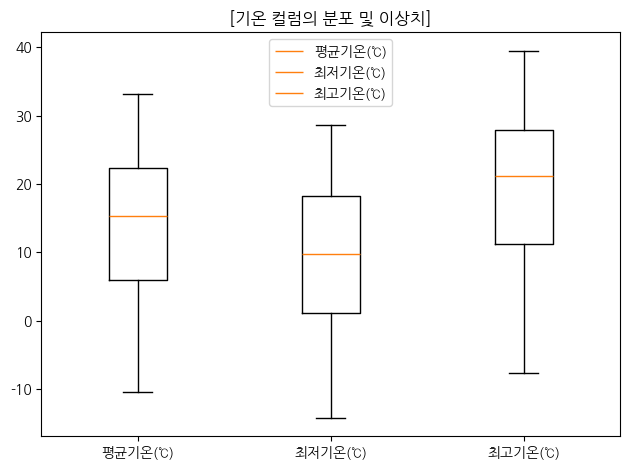

In [262]:
# 컬럼별 이상치 Boxplot 체크

data_name = ['평균기온(℃)', '최저기온(℃)', '최고기온(℃)']

plt.boxplot(dataDF[data_name], label=data_name, notch=False)


## 그래프 공통 요소
plt.title('[기온 컬럼의 분포 및 이상치]')

plt.legend()

plt.xticks([1,2,3], data_name)  

plt.tight_layout()
## 그래프 화면 출력
plt.show()

[4] 탐색적 분석(EDA) <hr>

### 전체적인 대구시의 1975.1.1 ~ 2025.11.9까지 기온변화
### => 시간에 따른 흐름: 선그래프
### => X축: 날짜(연도별)        Y축: 25도 이상인 데이터

In [263]:
# 날짜 컬럼이 datetime인지 보장
# 문자열은 글자일 뿐이고, 그래프의 x축은 “숫자로 계산 가능한 시간”을 원합니다.
# pd.to_datetime을 쓰면 ‘글자 날짜’를 ‘진짜 시간’(datetime64)로 바꿉니다.
# x축이 진짜 시간이 되면, matplotlib가 날짜를 숫자로 변환해서 눈금/라벨을 알아서 처리할 수 있어 오류가 사라집니다.
# 즉, “글자 날짜 → 진짜 시간”으로 바꿨기 때문에, 그래프의 날짜 축 계산이 가능해져 TypeError가 없어졌습니다.

# 변환 전에는 날짜 컬럼 object 타입
print(dataDF.info(), '\n')


# 날짜 컬럼: object ==> str이지만 날짜를 의미 => datetime64[ns]로 변환을 해야 함
dataDF['날짜'] = pd.to_datetime(dataDF['날짜'])

# 변환 후 타입 체크
print(type(dataDF['날짜'][0]), '\n') # 날짜 원소 각각은 Timestamp
print(dataDF.info(), '\n')          # 날짜 컬럼 자체는 datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18576 entries, 0 to 18575
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       18576 non-null  object 
 1   평균기온(℃)  18576 non-null  float64
 2   최저기온(℃)  18576 non-null  float64
 3   최고기온(℃)  18576 non-null  float64
dtypes: float64(3), object(1)
memory usage: 580.6+ KB
None 

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18576 entries, 0 to 18575
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       18576 non-null  datetime64[ns]
 1   평균기온(℃)  18576 non-null  float64       
 2   최저기온(℃)  18576 non-null  float64       
 3   최고기온(℃)  18576 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 580.6 KB
None 



,연도,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,1975,123,123,123,123
1,1976,112,112,112,112
2,1977,131,131,131,131
3,1978,139,139,139,139
4,1979,130,130,130,130
5,1980,110,110,110,110
6,1981,131,131,131,131
7,1982,139,139,139,139
8,1983,128,128,128,128
9,1984,130,130,130,130


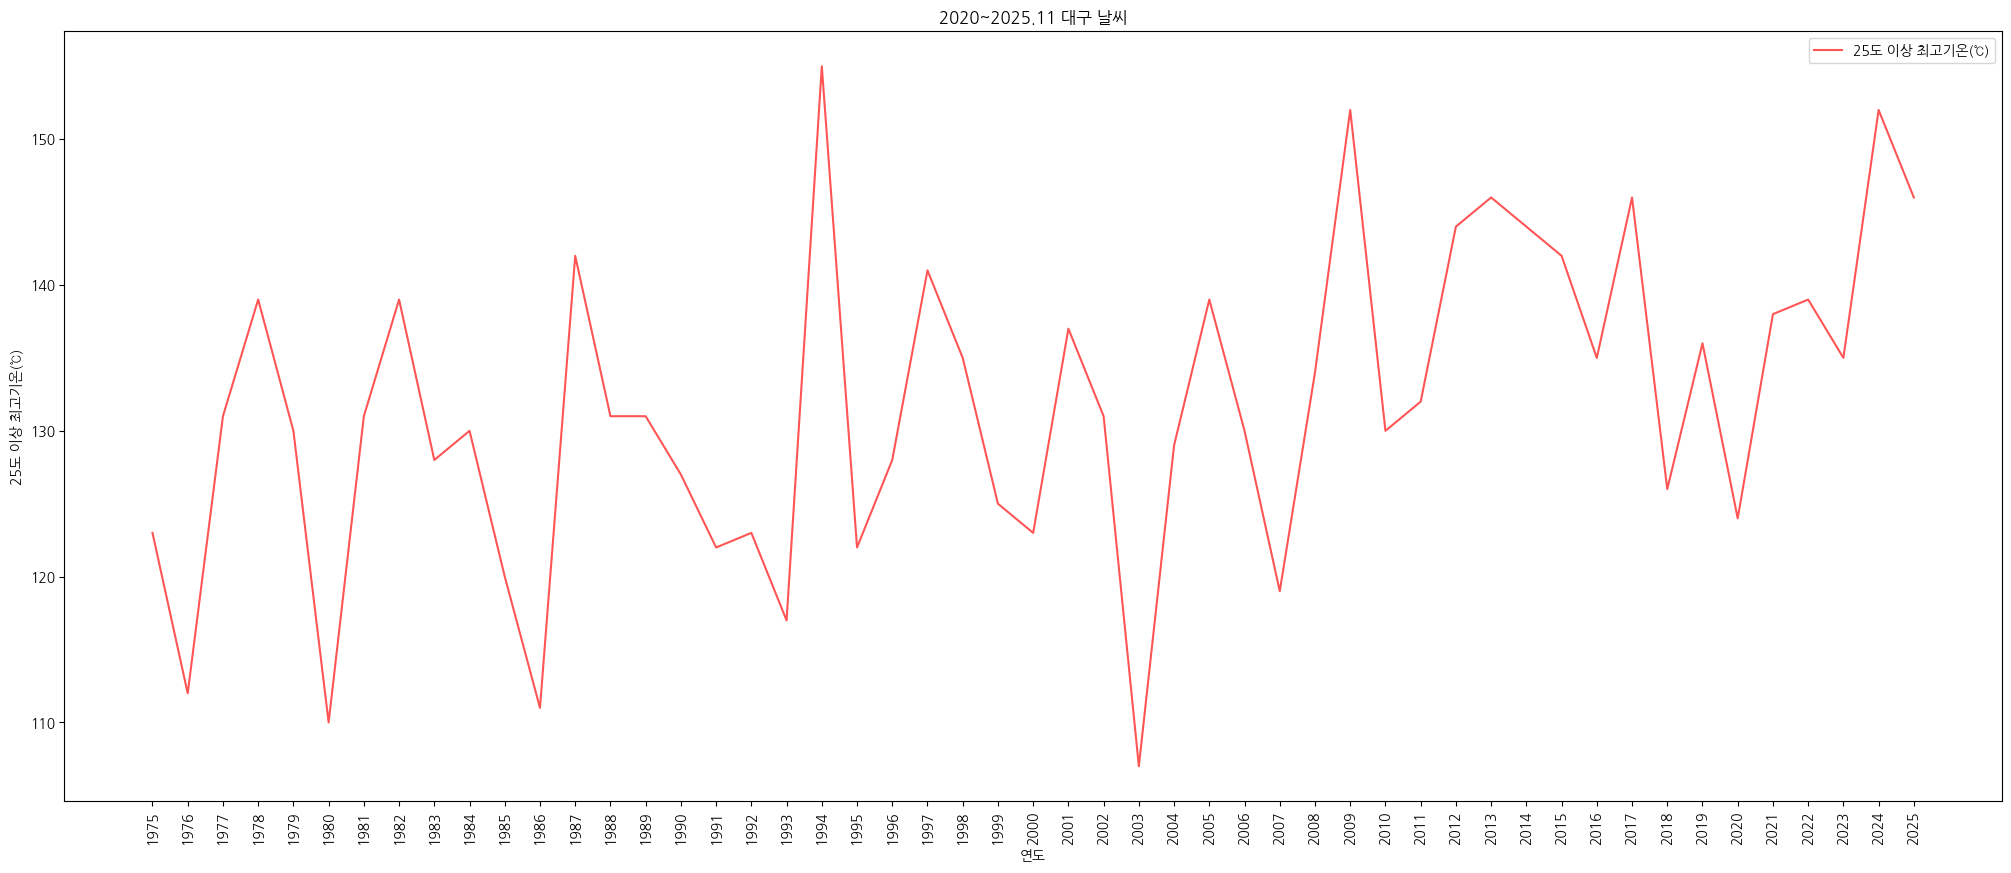

In [264]:
# [문제] 대구지역의 기온 변화 => 25도 이상인 일수(일별로 최고온도가 25도를 넘어가는 일수가 몇일 있는지)
# print(dataDF)

# 연도 컬럼 추가
dataDF['연도'] = dataDF['날짜'].dt.year  # 연도 추출 

# 최고온도가 25도를 넘어가는 데이터만 필터링
filtered = dataDF[dataDF["최고기온(℃)"] >= 25]
yearly = filtered.groupby("날짜", as_index=False).sum()
# display(yearly)


yearly = yearly.groupby('연도', as_index=False).count()
display(yearly)


# Period 배열 만들기 -------------------------------------------------------------------
pr_m = pd.period_range(start = yearly['연도'].iloc[0],   # 날짜 범위의 시작
                       end = yearly['연도'].iloc[-1],    # 날짜 범위의 끝
                       freq = 'Y')                      # 주기 설정 

# print(pr_m, pr_m.shape, range(1, pr_m.shape[0]+1))
# print(pr_m[0], type(pr_m[0])) # period 타입
# -------------------------------------------------------------------------------------
plt.figure(figsize=(25,10))

plt.plot(yearly['연도'], yearly['최고기온(℃)'], label='25도 이상 최고기온(℃)', color="#ff0000aa")

plt.title('2020~2025.11 대구 날씨')
plt.xlabel('연도'); plt.ylabel('25도 이상 최고기온(℃)')

plt.xticks(yearly['연도'], pr_m, rotation=90)

plt.legend()  

plt.show()

[5] 인사이트 도출 <hr>

### 대구 지역 분석 결과:
- 연도별로 최고기온이 25도 이상인 데이터가 점차적으로 증가하는 것이 아닌 제각각인 모습을 확인할 수 있음.
- 따라서 추가적으로 서울 지역의 온도 데이터도 분석해보기로 함.

In [265]:
FILE_NAME = '../DATA/서울_온도_75_25.csv'
dataDF2 = pd.read_csv(FILE_NAME, skiprows=7)
print(dataDF2.head())

           날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
0  1975-01-01  108      2.1     -0.8      6.0
1  1975-01-02  108      1.8     -2.0      5.1
2  1975-01-03  108     -1.5     -4.9      3.5
3  1975-01-04  108      0.6     -2.4      5.2
4  1975-01-05  108     -0.2     -3.4      4.3


기본 전처리 => 불필요한 컬럼, 데이터 삭제 <hr>

In [266]:
# 불필요한 컬럼 제거
dataDF2.drop(columns = '지점', inplace = True)
display(dataDF)

# 날짜 컬럼 앞에 붙은 '\t' 제거 -> 날짜 컬럼 타입 object로 str
dataDF2['날짜'] = dataDF2['날짜'].str.strip()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃),연도
0,1975-01-01,2.6,1.1,3.8,1975
1,1975-01-02,2.2,0.9,4.8,1975
2,1975-01-03,1.2,-1.8,5.6,1975
3,1975-01-04,-0.3,-2.1,1.9,1975
4,1975-01-05,0.5,-4.4,6.1,1975
...,...,...,...,...,...
18571,2025-11-05,11.8,5.4,20.2,2025
18572,2025-11-06,12.8,6.7,21.2,2025
18573,2025-11-07,13.1,7.7,20.6,2025
18574,2025-11-08,12.9,7.8,18.3,2025


[3] 세부 전처리 <hr> => 결측치/중복값/이상치

In [267]:
# 결측치 확인 및 제거
dataDF2.isnull().sum()   # 결측치 확인

print(dataDF2[dataDF2['최저기온(℃)'].isnull() == True])
print(dataDF2[dataDF2['최고기온(℃)'].isnull() == True])
msDF2 = dataDF2[dataDF2['최저기온(℃)'].isnull() == True]
msDF2_1 = dataDF2[dataDF2['최고기온(℃)'].isnull() == True]

# 데이터의 특성 즉, 기온 무작위성 X => 같은 컬럼의 값들이 서로 연결성
# 삭제하기 말고 채우기 => 이전/이후값들의 평균값으로 채우기
for idx in msDF2.index:

    # 결측치인 행만 추출
    cols = dataDF2.iloc[17113][dataDF2.iloc[17113].isnull()].index

    # 결측치 존재 컬럼/행의 앞/뒤 3개행 선택 => 평균: {컬럼명:평균값,...}
    fill_values = dataDF2[cols].iloc[idx-1:idx+2].mean(numeric_only=True).to_dict()
    dataDF2.loc[idx] = dataDF2.iloc[idx].fillna(fill_values)

for idx in msDF2_1.index:
    # 결측치인 행만 추출
    cols = dataDF2.iloc[15352][dataDF2.iloc[15352].isnull()].index

    # 결측치 존재 컬럼/행의 앞/뒤 3개행 선택 => 평균: {컬럼명:평균값,...}
    fill_values = dataDF2[cols].iloc[idx-1:idx+2].mean(numeric_only=True).to_dict()
    dataDF2.loc[idx] = dataDF2.iloc[idx].fillna(fill_values)

# 결측치 대체 확인
print(dataDF2.isnull().sum())

# 중복값 체크
# subset 방법)
duDF = dataDF2.duplicated(subset = dataDF2.columns[1:], keep=False)
print(f'중복값 체크: {dataDF2[duDF]}')
# print(dataDF.sort_values(by=['평균기온(℃)']))

               날짜  평균기온(℃)  최저기온(℃)  최고기온(℃)
17386  2022-08-08     26.8      NaN     28.4
               날짜  평균기온(℃)  최저기온(℃)  최고기온(℃)
15625  2017-10-12     11.4      8.8      NaN
날짜         0
평균기온(℃)    0
최저기온(℃)    1
최고기온(℃)    1
dtype: int64
중복값 체크:                날짜  평균기온(℃)  최저기온(℃)  최고기온(℃)
22     1975-01-23      0.6     -3.8      5.7
26     1975-01-27     -1.0     -4.4      3.4
48     1975-02-18     -1.0     -4.4      3.4
91     1975-04-02      5.5      1.6     11.3
130    1975-05-11     20.8     16.3     26.5
...           ...      ...      ...      ...
18390  2025-05-08     17.4      9.7     24.9
18414  2025-06-01     22.6     17.0     29.3
18420  2025-06-07     23.7     19.8     28.2
18550  2025-10-15     20.2     16.1     25.3
18566  2025-10-31     15.1     11.3     20.7

[598 rows x 4 columns]


In [268]:
# 이상치 체크
import sys
sys.path.append(r'C:\Users\khw27\바탕 화면\SL_KDT_10\04_ANALYSIS\Utils')
import datautil as du

# 수치컬럼의 이상치 검사
numeric_cols = dataDF2.select_dtypes(include='number')
du.get_outlier_records(dataDF2, numeric_cols)

[]

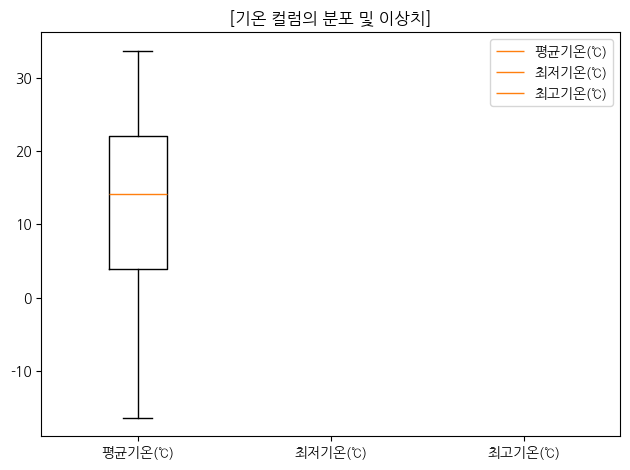

In [269]:
# 컬럼별 이상치 Boxplot 체크

data_name = ['평균기온(℃)', '최저기온(℃)', '최고기온(℃)']

plt.boxplot(dataDF2[data_name], label=data_name, notch=False)


## 그래프 공통 요소
plt.title('[기온 컬럼의 분포 및 이상치]')

plt.legend()

plt.xticks([1,2,3], data_name)  

plt.tight_layout()
## 그래프 화면 출력
plt.show()

[4] 탐색적 분석(EDA) <hr>

### 전체적인 서울시의 1975.1.1 ~ 2025.11.9까지 기온변화
### => 시간에 따른 흐름: 선그래프
### => X축: 날짜(연도별)        Y축: 25도 이상인 데이터

In [270]:
# 날짜 컬럼이 datetime인지 보장
# 문자열은 글자일 뿐이고, 그래프의 x축은 “숫자로 계산 가능한 시간”을 원합니다.
# pd.to_datetime을 쓰면 ‘글자 날짜’를 ‘진짜 시간’(datetime64)로 바꿉니다.
# x축이 진짜 시간이 되면, matplotlib가 날짜를 숫자로 변환해서 눈금/라벨을 알아서 처리할 수 있어 오류가 사라집니다.
# 즉, “글자 날짜 → 진짜 시간”으로 바꿨기 때문에, 그래프의 날짜 축 계산이 가능해져 TypeError가 없어졌습니다.

# 변환 전에는 날짜 컬럼 object 타입
print(dataDF2.info(), '\n')


# 날짜 컬럼: object ==> str이지만 날짜를 의미 => datetime64[ns]로 변환을 해야 함
dataDF2['날짜'] = pd.to_datetime(dataDF2['날짜'])

# 변환 후 타입 체크
print(type(dataDF2['날짜'][0]), '\n') # 날짜 원소 각각은 Timestamp
print(dataDF2.info(), '\n')          # 날짜 컬럼 자체는 datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18576 entries, 0 to 18575
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       18576 non-null  object 
 1   평균기온(℃)  18576 non-null  float64
 2   최저기온(℃)  18575 non-null  float64
 3   최고기온(℃)  18575 non-null  float64
dtypes: float64(3), object(1)
memory usage: 580.6+ KB
None 

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18576 entries, 0 to 18575
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       18576 non-null  datetime64[ns]
 1   평균기온(℃)  18576 non-null  float64       
 2   최저기온(℃)  18575 non-null  float64       
 3   최고기온(℃)  18575 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 580.6 KB
None 



,연도,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,1975,123,123,123,123
1,1976,103,103,103,103
2,1977,129,129,129,129
3,1978,121,121,121,121
4,1979,108,108,108,108
5,1980,89,89,89,89
6,1981,101,101,101,101
7,1982,126,126,126,126
8,1983,111,111,111,111
9,1984,111,111,111,111


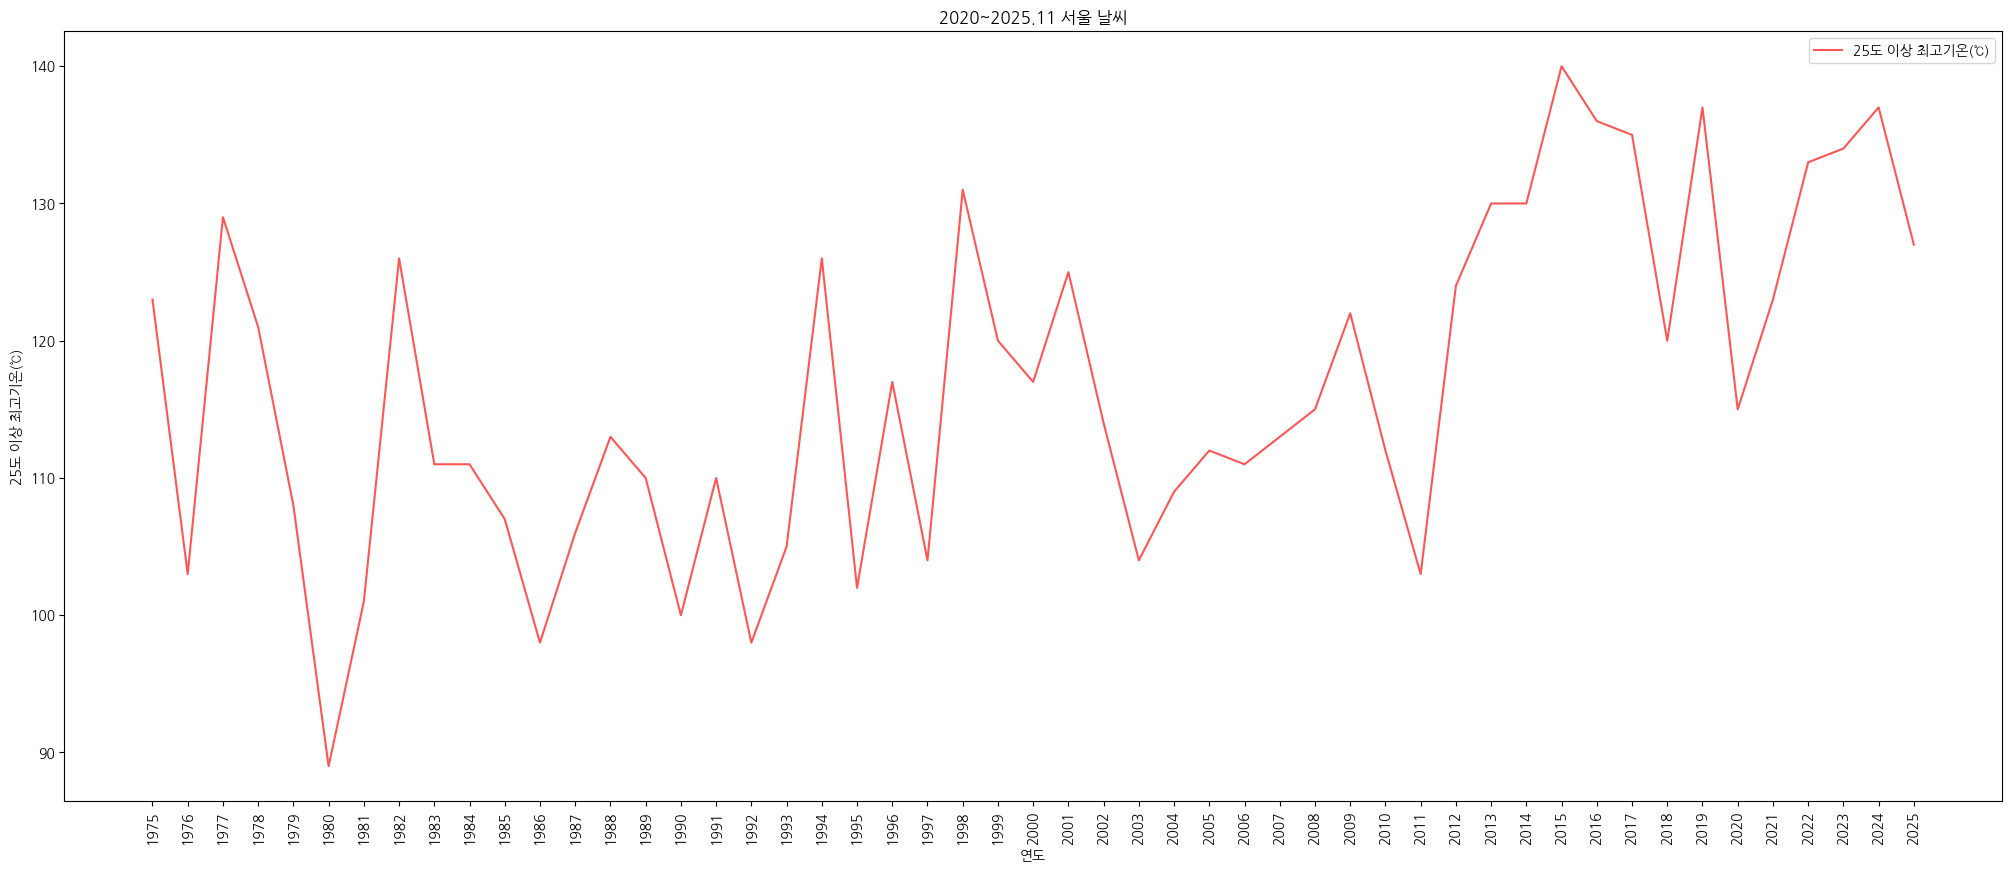

In [272]:
# 서울지역의 기온 변화 => 25도 이상인 일수(일별로 최고온도가 25도를 넘어가는 일수가 몇일 있는지)
# print(dataDF2)

# 연도 컬럼 추가
dataDF2['연도'] = dataDF2['날짜'].dt.year  # 연도 추출 

# 최고온도가 25도를 넘어가는 데이터만 필터링
filtered = dataDF2[dataDF2["최고기온(℃)"] >= 25]
yearly = filtered.groupby("날짜", as_index=False).sum()
# display(yearly)


yearly = yearly.groupby('연도', as_index=False).count()
display(yearly)


# Period 배열 만들기 -------------------------------------------------------------------
pr_m = pd.period_range(start = yearly['연도'].iloc[0],   # 날짜 범위의 시작
                       end = yearly['연도'].iloc[-1],    # 날짜 범위의 끝
                       freq = 'Y')                      # 주기 설정 

# print(pr_m, pr_m.shape, range(1, pr_m.shape[0]+1))
# print(pr_m[0], type(pr_m[0])) # period 타입
# -------------------------------------------------------------------------------------
plt.figure(figsize=(25,10))

plt.plot(yearly['연도'], yearly['최고기온(℃)'], label='25도 이상 최고기온(℃)', color="#ff0000aa")

plt.title('2020~2025.11 서울 날씨')
plt.xlabel('연도'); plt.ylabel('25도 이상 최고기온(℃)')

plt.xticks(yearly['연도'], pr_m, rotation=90)

plt.legend()  

plt.show()

### 최종 인사이트 도출:
- 서울과 대구의 25도 이상 기온 분포를 분석한 결과, 특정 연도나 기간과의 뚜렷한 상관성이 관찰되지 않았다.  
- 이는 25도 이상 기온 데이터만으로는 지구온난화 추세를 입증하기 어렵다는 점을 시사한다.  
- 따라서 보다 명확한 기후 변화 분석을 위해서는 평균기온, 계절별 변화 등 추가적인 지표를 함께 고려할 필요가 있다.


### 과제 2] 대구지역의 기온 변화 => 25도 이상인 일수(일별로 최고온도가 25도를 넘어가는 일수가 몇일 있는지)
- 데이터: 기상청 사이트